# Project: Investigation of the Soccer data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#resources">Resources Used</a></li>
</ul>

<a id='intro'></a>
## Introduction

This is soccer data. We have Match table which gives information about matches played in different seasons, different leagues, different countries and different stages.
Usually home teams have advantages over away teams which affects the result of the match. So we will have following questions to investigate.

1. Are average goals scored by home teams are higher than the average goals scored by away teams.
2. Is there any home advantage? Are home teams have more victories than away teams? 
3. Are average goals scored by home teams are statistically higher than the average goals scored by away teams.

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import math
from datetime import datetime as dt
from scipy import stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


<a id='wrangling'></a>
## Data Wrangling

### General Properties
1. We can see that database has 8 tables and out of which 7 tables is useful which are all tables except sqlite_sequence.
2. Dimensions of table Country are (11, 2).
3. Dimensions of table League are (11, 3).
4. Dimensions of table Team are (299, 5).
5. Dimensions of table Player are (11060, 7).
6. Dimensions of table Team_Attributes are (1458, 25).
7. Dimensions of table Player_Attributes are (183978, 42).
8. Dimensions of table Match are (25979, 115)

In [2]:
# Check the table list from the database.

#Create a connection with the database.
conn = sqlite3.connect('database.sqlite')

# Save the table names detail in a variable.
tables = pd.read_sql("""SELECT * from sqlite_master WHERE type = 'table';""", conn)
tables


,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [3]:
# Function to load the tables and save them to a variable and also check dimensions of the table.
def read_table(table_name):
    """This function takes the table name as input and return all values from the table 
    in a dataframe and prints the dimensions of the table and 
    also first 5 rows of the data frame."""
    table = pd.read_sql("SELECT * from {}".format(table_name), conn)
    print("Dimensions of table {} are {}".format(table_name, table.shape))
    print(table.head())
    return(table)

In [4]:
# Read Country table and store it as dataframe in respective variable
country = read_table('Country')

Dimensions of table Country are (11, 2)
      id     name
0      1  Belgium
1   1729  England
2   4769   France
3   7809  Germany
4  10257    Italy


In [5]:
# Read League table and store it as dataframe in respective variable
league = read_table('League')

Dimensions of table League are (11, 3)
      id  country_id                    name
0      1           1  Belgium Jupiler League
1   1729        1729  England Premier League
2   4769        4769          France Ligue 1
3   7809        7809   Germany 1. Bundesliga
4  10257       10257           Italy Serie A


In [6]:
# Read Team table and store it as dataframe in respective variable
team = read_table('Team')

Dimensions of table Team are (299, 5)
   id  team_api_id  team_fifa_api_id     team_long_name team_short_name
0   1         9987             673.0           KRC Genk             GEN
1   2         9993             675.0       Beerschot AC             BAC
2   3        10000           15005.0   SV Zulte-Waregem             ZUL
3   4         9994            2007.0   Sporting Lokeren             LOK
4   5         9984            1750.0  KSV Cercle Brugge             CEB


In [7]:
# Read Player table and store it as dataframe in respective variable
player = read_table('Player')

Dimensions of table Player are (11060, 7)
   id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
1  1989-12-15 00:00:00  170.18     146  
2  1991-05-13 00:00:00  170.18     163  
3  1982-05-08 00:00:00  182.88     198  
4  1979-11-08 00:00:00  182.88     154  


In [8]:
# Read Team_Attributes table and store it as dataframe in respective variable
team_attributes = read_table('Team_Attributes')

Dimensions of table Team_Attributes are (1458, 25)
   id  team_fifa_api_id  team_api_id                 date  buildUpPlaySpeed  \
0   1               434         9930  2010-02-22 00:00:00                60   
1   2               434         9930  2014-09-19 00:00:00                52   
2   3               434         9930  2015-09-10 00:00:00                47   
3   4                77         8485  2010-02-22 00:00:00                70   
4   5                77         8485  2011-02-22 00:00:00                47   

  buildUpPlaySpeedClass  buildUpPlayDribbling buildUpPlayDribblingClass  \
0              Balanced                   NaN                    Little   
1              Balanced                  48.0                    Normal   
2              Balanced                  41.0                    Normal   
3                  Fast                   NaN                    Little   
4              Balanced                   NaN                    Little   

   buildUpPlayPassing b

In [9]:
# Read Player_Attaributes table and store it as dataframe in respective variable
player_attributes = read_table('Player_Attributes')

Dimensions of table Player_Attributes are (183978, 42)
   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium      

In [10]:
# Read Match table and store it as dataframe in respective variable
match = read_table('Match')

Dimensions of table Match are (25979, 115)
   id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   
3   4           1          1  2008/2009      1  2008-08-17 00:00:00   
4   5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...   \
0        492473              9987              9993               1  ...    
1        492474             10000              9994               0  ...    
2        492475              9984              8635               0  ...    
3        492476              9991              9998               5  ...    
4        492477              7947              9985               1  ...    

    SJA   VCH   VCD   VCA   GBH   GBD   GBA   BSH   BSD   BSA  
0  

In [11]:
# Close the connection with the database
conn.close()

### Checking Missing values in all table
**Country Table:**
No missing values found in the table.

**League Table:**
No missing values found in the table.

**Team Table:**
Column **'team_fifa_api_id'** have some missing values but this shouldn't cause any issue because we can use 'team_api_id'.

**Player Table:**
No missing values found in the table.

**Team_Attributes Table:**
Column **'buildUpPlayDribbling'** have lot of missing values. We will analyze this later on.

**Player_Attributes Table:**
Lot of missing values in various columns in this table.

**Match table:**
First 11 columns don't have any missing values and these are the columns which are important to decide win or loose. So we can ignore other columns which have missing values.

In [12]:
# Function to check and print missing values in each columns of the table and columns which 
# don't have missing values.

def columns_with_without_na(dataframe):
    """this function prints the column with total sum of NA elements and also 
    columns with zero NA elements"""
    column_na_sum = dataframe.isna().sum()
    column_no_na = column_na_sum[column_na_sum == 0]
    print("Total NA element in columns in table \n {}".format(column_na_sum))
    print("Columns without any NA elements in table \n {}".format(column_no_na))
    

In [13]:
# Columns with total NA and columns with no NA in table Country
columns_with_without_na(country)

Total NA element in columns in table 
 id      0
name    0
dtype: int64
Columns without any NA elements in table 
 id      0
name    0
dtype: int64


In [14]:
# Columns with total NA and columns with no NA in table League
columns_with_without_na(league)

Total NA element in columns in table 
 id            0
country_id    0
name          0
dtype: int64
Columns without any NA elements in table 
 id            0
country_id    0
name          0
dtype: int64


In [15]:
# Columns with total NA and columns with no NA in table Team
columns_with_without_na(team)

Total NA element in columns in table 
 id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64
Columns without any NA elements in table 
 id                 0
team_api_id        0
team_long_name     0
team_short_name    0
dtype: int64


In [16]:
# Columns with total NA and columns with no NA in table Player
columns_with_without_na(player)

Total NA element in columns in table 
 id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64
Columns without any NA elements in table 
 id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64


In [17]:
# Columns with total NA and columns with no NA in table Team_Attributes
columns_with_without_na(team_attributes)

Total NA element in columns in table 
 id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int6

In [18]:
# Columns with total NA and columns with no NA in table Player_Attributes
columns_with_without_na(player_attributes)

Total NA element in columns in table 
 id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking  

In [19]:
# Columns with total NA and columns with no NA in table Match
columns_with_without_na(match)

Total NA element in columns in table 
 id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
                    ...  
B365H                3387
B365D                3387
B365A                3387
BWH                  3404
BWD                  3404
BWA                  3404

### Checking Datatype of Each Column
**Come columns requires change of datatype like date, different IDs, etc which will be worked upon later as per requirement in the tables**

In [20]:
# This function prints datatype of each column in the table.
def datatype(dataframe):
    print("datatype of columns in table is \n{}".format(dataframe.dtypes))

In [21]:
# Printing datatype of each column of Country
datatype(country)

datatype of columns in table is 
id       int64
name    object
dtype: object


In [22]:
# Printing datatype of each column of League
datatype(league)

datatype of columns in table is 
id             int64
country_id     int64
name          object
dtype: object


In [23]:
# Printing datatype of each column of Team
datatype(team)

datatype of columns in table is 
id                    int64
team_api_id           int64
team_fifa_api_id    float64
team_long_name       object
team_short_name      object
dtype: object


In [24]:
# Printing datatype of each column of Player
datatype(player)

datatype of columns in table is 
id                      int64
player_api_id           int64
player_name            object
player_fifa_api_id      int64
birthday               object
height                float64
weight                  int64
dtype: object


In [25]:
# Printing datatype of each column of Team_Attributes
datatype(team_attributes)

datatype of columns in table is 
id                                  int64
team_fifa_api_id                    int64
team_api_id                         int64
date                               object
buildUpPlaySpeed                    int64
buildUpPlaySpeedClass              object
buildUpPlayDribbling              float64
buildUpPlayDribblingClass          object
buildUpPlayPassing                  int64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing               int64
chanceCreationPassingClass         object
chanceCreationCrossing              int64
chanceCreationCrossingClass        object
chanceCreationShooting              int64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                     int64
defencePressureClass               object
defenceAggression                   int64
defenceAggressionClass             object
defenceTeamWidth                    int64
d

In [26]:
# Printing datatype of each column of Player_Attributes
datatype(player_attributes)

datatype of columns in table is 
id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positi

In [27]:
# Printing datatype of each column of Match
datatype(match)

datatype of columns in table is 
id                    int64
country_id            int64
league_id             int64
season               object
stage                 int64
date                 object
match_api_id          int64
home_team_api_id      int64
away_team_api_id      int64
home_team_goal        int64
away_team_goal        int64
home_player_X1      float64
home_player_X2      float64
home_player_X3      float64
home_player_X4      float64
home_player_X5      float64
home_player_X6      float64
home_player_X7      float64
home_player_X8      float64
home_player_X9      float64
home_player_X10     float64
home_player_X11     float64
away_player_X1      float64
away_player_X2      float64
away_player_X3      float64
away_player_X4      float64
away_player_X5      float64
away_player_X6      float64
away_player_X7      float64
away_player_X8      float64
                     ...   
B365H               float64
B365D               float64
B365A               float64
BWH            

### Data Cleaning
In this section, various data cleaning techniques will be used. Various tables will be merged and important information will be extracted from the tables and will be stored in the new variables.

**Most important table is Match table which will be used to decide win or loose of the teams. Only first 11 columns are important for that. So, these columns are extracted and saved in new variable.**

In [28]:
# Extract out first 11 columns from the table match and save it to new variable match_modified
match_modified = match.iloc[:, 0:11]
match_modified.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


**It is better to have country_name, league_name, home_team_name and away_team_name instead of IDs. So we will extract out these values with merge of match_modified table with country, league and team tables and change the names of the respctive columns.**

In [29]:
# Merge match_modified with country table to get country name
match_modified_merge = match_modified.merge(country, left_on='country_id', right_on='id', 
                                           suffixes= ['', '_country'])
match_modified_merge.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_country,name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1,Belgium
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,1,Belgium
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,1,Belgium
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,1,Belgium
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,1,Belgium


In [30]:
# Merge match_modified with country table to get league name
match_modified_merge = match_modified_merge.merge(league, left_on='league_id', right_on='id', 
                                           suffixes= ['', '_league'])
match_modified_merge.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_country,name,id_league,country_id_league,name_league
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1,Belgium,1,1,Belgium Jupiler League
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,1,Belgium,1,1,Belgium Jupiler League
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,1,Belgium,1,1,Belgium Jupiler League
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,1,Belgium,1,1,Belgium Jupiler League
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,1,Belgium,1,1,Belgium Jupiler League


In [31]:
# Merge match_modified with country table to get home_team_name and away_team_name
match_modified_merge = match_modified_merge.merge(team, left_on='home_team_api_id', right_on='team_api_id', 
                                           suffixes= ['', '_home'])
match_modified_merge = match_modified_merge.merge(team, left_on='away_team_api_id', right_on='team_api_id', 
                                           suffixes= ['', '_away'])
match_modified_merge.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,id_home,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id_away,team_api_id_away,team_fifa_api_id_away,team_long_name_away,team_short_name_away
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,1,9987,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC
1,483,1,1,2009/2010,5,2009-08-30 00:00:00,665353,9987,9993,1,...,1,9987,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC
2,524,1,1,2010/2011,1,2010-08-01 00:00:00,838476,9987,9993,2,...,1,9987,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC
3,759,1,1,2011/2012,1,2011-07-30 00:00:00,1032694,9987,9993,3,...,1,9987,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC
4,1014,1,1,2012/2013,11,2012-10-20 00:00:00,1224064,9987,9993,3,...,1,9987,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC


In [32]:
# We will take out columns which are required like country_name replacing country_id, team_long_name instead of
# home_team_api_id, etc.
match_modified_merge = match_modified_merge[['id', 'name', 'name_league', 'season', 'stage', 'date', 
                                                 'match_api_id', 'team_long_name', 'team_long_name_away', 
                                                 'home_team_goal', 'away_team_goal']]

In [33]:
"""We need to change the names of various columns like team_long_name to home_team_name, team_long_name_away to 
away_team_name, name to country_name and name_league to league_name. We will perform this now."""

match_modified_merge.rename(columns = {'team_long_name':'home_team_name', 'team_long_name_away':'away_team_name', 
                           'name':'country_name', 'name_league':'league_name'}, inplace = True)

In [34]:
match_modified_merge.head()

,id,country_name,league_name,season,stage,date,match_api_id,home_team_name,away_team_name,home_team_goal,away_team_goal
0,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492473,KRC Genk,Beerschot AC,1,1
1,483,Belgium,Belgium Jupiler League,2009/2010,5,2009-08-30 00:00:00,665353,KRC Genk,Beerschot AC,1,1
2,524,Belgium,Belgium Jupiler League,2010/2011,1,2010-08-01 00:00:00,838476,KRC Genk,Beerschot AC,2,1
3,759,Belgium,Belgium Jupiler League,2011/2012,1,2011-07-30 00:00:00,1032694,KRC Genk,Beerschot AC,3,1
4,1014,Belgium,Belgium Jupiler League,2012/2013,11,2012-10-20 00:00:00,1224064,KRC Genk,Beerschot AC,3,0


In [35]:
"""We will add a new column for home team win named as home_win which can have three values, that is, 'win', 'loose'
 and 'draw'. We will compare 'home_team_goal' with 'away_team_goal' which gives us mentioned values."""

# Add column 'home_win' with all values as Null
match_modified_merge['home_win'] = 'Null'

#Change the value of 'home_win' as per home_team_goal and away_team_goal comparison
match_modified_merge.loc[(match_modified_merge['home_team_goal'] > match_modified_merge['away_team_goal']), 
                     'home_win'] = 'win'
match_modified_merge.loc[(match_modified_merge['home_team_goal'] < match_modified_merge['away_team_goal']), 
                     'home_win'] = 'loose'
match_modified_merge.loc[(match_modified_merge['home_team_goal'] == match_modified_merge['away_team_goal']), 
                     'home_win'] = 'draw'

#Check if values have changed or not
match_modified_merge.head()

,id,country_name,league_name,season,stage,date,match_api_id,home_team_name,away_team_name,home_team_goal,away_team_goal,home_win
0,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492473,KRC Genk,Beerschot AC,1,1,draw
1,483,Belgium,Belgium Jupiler League,2009/2010,5,2009-08-30 00:00:00,665353,KRC Genk,Beerschot AC,1,1,draw
2,524,Belgium,Belgium Jupiler League,2010/2011,1,2010-08-01 00:00:00,838476,KRC Genk,Beerschot AC,2,1,win
3,759,Belgium,Belgium Jupiler League,2011/2012,1,2011-07-30 00:00:00,1032694,KRC Genk,Beerschot AC,3,1,win
4,1014,Belgium,Belgium Jupiler League,2012/2013,11,2012-10-20 00:00:00,1224064,KRC Genk,Beerschot AC,3,0,win


In [36]:
match_modified_merge.dtypes

id                 int64
country_name      object
league_name       object
season            object
stage              int64
date              object
match_api_id       int64
home_team_name    object
away_team_name    object
home_team_goal     int64
away_team_goal     int64
home_win          object
dtype: object

In [37]:
# Function to change an element to datetime format.
def change_to_time(element):
    """This function changes an element in string format to datetime format."""
    element = dt.strptime(element, "%Y-%m-%d %H:%M:%S")
    return(element)

**We can see some of the columns like match_api_id and stage should be object variables instead of numerical so we will change datatype of these variable. Also we will change date variable to appropriate datatype.**

In [38]:
# Changing columns to required datatypes. We dont need time as date is enough for further analysis.
match_modified_merge['stage']= match_modified_merge['stage'].astype('object')
match_modified_merge['match_api_id']= match_modified_merge['match_api_id'].astype('object')
match_modified_merge['date']= match_modified_merge['date'].apply(change_to_time)

In [39]:
# Fucntion to extract year from datetime.
def extract_year(element):
    """This function extract an year from the datetime."""
    year = dt.strftime(element, '%Y')
    return(year)

In [40]:
#Extracting year from the date.
match_modified_merge['year']= match_modified_merge['date'].apply(extract_year)

In [41]:
match_modified_merge.head()

,id,country_name,league_name,season,stage,date,match_api_id,home_team_name,away_team_name,home_team_goal,away_team_goal,home_win,year
0,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17,492473,KRC Genk,Beerschot AC,1,1,draw,2008
1,483,Belgium,Belgium Jupiler League,2009/2010,5,2009-08-30,665353,KRC Genk,Beerschot AC,1,1,draw,2009
2,524,Belgium,Belgium Jupiler League,2010/2011,1,2010-08-01,838476,KRC Genk,Beerschot AC,2,1,win,2010
3,759,Belgium,Belgium Jupiler League,2011/2012,1,2011-07-30,1032694,KRC Genk,Beerschot AC,3,1,win,2011
4,1014,Belgium,Belgium Jupiler League,2012/2013,11,2012-10-20,1224064,KRC Genk,Beerschot AC,3,0,win,2012


**Analysis of missing value in team_attributes table. Add team name and use team name instead of team ID in team_attributes table.**

In [42]:
team_attributes_merge = team_attributes.merge(team, left_on='team_api_id', right_on='team_api_id', 
                                              suffixes=['', '_team'])
team_attributes_merge.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,id_team,team_fifa_api_id_team,team_long_name,team_short_name
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,Medium,55,Press,45,Normal,Cover,49119,434.0,FC Aarau,AAR
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,Medium,44,Press,54,Normal,Cover,49119,434.0,FC Aarau,AAR
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,Medium,44,Press,54,Normal,Cover,49119,434.0,FC Aarau,AAR
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,Medium,70,Double,70,Wide,Cover,39393,77.0,Aberdeen,ABE
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,Medium,47,Press,52,Normal,Cover,39393,77.0,Aberdeen,ABE


In [43]:
team_attributes_merge = team_attributes_merge[['id','date', 'team_long_name', 'buildUpPlaySpeed', 
                                               'buildUpPlaySpeedClass', 'buildUpPlayDribbling', 
                                               'buildUpPlayDribblingClass', 'buildUpPlayPassing', 
                                               'buildUpPlayPassingClass', 'buildUpPlayPositioningClass', 
                                               'chanceCreationPassing', 'chanceCreationPassingClass', 
                                               'chanceCreationCrossing', 'chanceCreationCrossingClass', 
                                               'chanceCreationShooting', 'chanceCreationShootingClass', 
                                               'chanceCreationPositioningClass', 'defencePressure', 
                                               'defencePressureClass', 'defenceAggression', 
                                               'defenceAggressionClass', 'defenceTeamWidth', 
                                               'defenceTeamWidthClass', 'defenceDefenderLineClass']]

team_attributes_merge.head()

,id,date,team_long_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,2010-02-22 00:00:00,FC Aarau,60,Balanced,NaN,Little,50,Mixed,Organised,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,2014-09-19 00:00:00,FC Aarau,52,Balanced,48.0,Normal,56,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,2015-09-10 00:00:00,FC Aarau,47,Balanced,41.0,Normal,54,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,2010-02-22 00:00:00,Aberdeen,70,Fast,NaN,Little,70,Long,Organised,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,2011-02-22 00:00:00,Aberdeen,47,Balanced,NaN,Little,52,Mixed,Organised,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [44]:
# Only one column has missing values in table team_attributes
columns_with_without_na(team_attributes_merge)

Total NA element in columns in table 
 id                                  0
date                                0
team_long_name                      0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64
Columns without any NA elements in t

In [45]:
#Check missing 
team_attributes_merge.groupby('buildUpPlayDribblingClass').count()

,id,date,team_long_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
buildUpPlayDribblingClass,,,,,,,,,,,,,,,,,,,,,
Little,1004,1004,1004,1004,1004,35,1004,1004,1004,1004,...,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004
Lots,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
Normal,433,433,433,433,433,433,433,433,433,433,...,433,433,433,433,433,433,433,433,433,433


**Above we can clearly see that all the missing values are from the 'buildUpPlaySpeedClass == Little'. So we can fill this value with either mode/median. Lets looks at whether mode/median is very much different mean and replace value accordingly.**

In [46]:
print("Mean is")
print(team_attributes_merge.groupby('buildUpPlayDribblingClass')['buildUpPlayDribbling'].mean())
print('')
print("Median is")
print(team_attributes_merge.groupby('buildUpPlayDribblingClass')['buildUpPlayDribbling'].median())

Mean is
buildUpPlayDribblingClass
Little    30.485714
Lots      69.809524
Normal    49.043880
Name: buildUpPlayDribbling, dtype: float64

Median is
buildUpPlayDribblingClass
Little    32.0
Lots      69.0
Normal    49.0
Name: buildUpPlayDribbling, dtype: float64


In [47]:
# Checking non-missing values for the buildUpPlayDribblingClass = Little.
team_attributes[(team_attributes['buildUpPlayDribblingClass'] == 'Little') & (team_attributes['buildUpPlayDribbling'].notna())]

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
80,81,2,10252,2014-09-19 00:00:00,66,Balanced,32.0,Little,72,Long,...,56,Normal,Organised,39,Medium,42,Press,52,Normal,Cover
140,141,32,8178,2014-09-19 00:00:00,69,Fast,30.0,Little,55,Mixed,...,39,Normal,Organised,50,Medium,46,Press,54,Normal,Cover
141,142,32,8178,2015-09-10 00:00:00,73,Fast,29.0,Little,55,Mixed,...,61,Normal,Organised,61,Medium,72,Double,50,Normal,Cover
147,148,21,9823,2015-09-10 00:00:00,45,Balanced,24.0,Little,28,Short,...,22,Little,Free Form,72,High,53,Press,59,Normal,Cover
171,172,88,8658,2015-09-10 00:00:00,56,Balanced,32.0,Little,75,Long,...,64,Normal,Organised,42,Medium,47,Press,54,Normal,Cover
176,177,3,8655,2014-09-19 00:00:00,44,Balanced,31.0,Little,62,Mixed,...,40,Normal,Organised,50,Medium,50,Press,47,Normal,Cover
213,214,22,9789,2014-09-19 00:00:00,76,Fast,33.0,Little,61,Mixed,...,73,Lots,Free Form,60,Medium,68,Double,43,Normal,Cover
252,253,1796,8191,2014-09-19 00:00:00,48,Balanced,32.0,Little,74,Long,...,58,Normal,Organised,54,Medium,57,Press,58,Normal,Cover
253,254,1796,8191,2015-09-10 00:00:00,54,Balanced,32.0,Little,67,Long,...,47,Normal,Organised,63,Medium,62,Press,58,Normal,Cover
265,266,1842,8529,2015-09-10 00:00:00,67,Fast,32.0,Little,35,Mixed,...,69,Lots,Free Form,65,Medium,65,Press,57,Normal,Offside Trap


**Above we are not seeing any relationship between date and missing values of buildUpPlayDribblingClass = little. So we will fill missing values with median.**

In [48]:
# Filling missing values with the median.
team_attributes_merge.buildUpPlayDribbling.fillna(team_attributes_merge.groupby('buildUpPlayDribblingClass')
                                                  .buildUpPlayDribbling.transform('median'), inplace = True)

In [49]:
# Changing date column to date format.
team_attributes_merge['date'] = team_attributes_merge['date'].apply(change_to_time)

In [50]:
# Extracting year and save it in a new column.
team_attributes_merge['year'] = team_attributes_merge['date'].apply(extract_year)

In [51]:
team_attributes_merge.head()

,id,date,team_long_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,year
0,1,2010-02-22,FC Aarau,60,Balanced,32.0,Little,50,Mixed,Organised,...,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,2010
1,2,2014-09-19,FC Aarau,52,Balanced,48.0,Normal,56,Mixed,Organised,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,2014
2,3,2015-09-10,FC Aarau,47,Balanced,41.0,Normal,54,Mixed,Organised,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,2015
3,4,2010-02-22,Aberdeen,70,Fast,32.0,Little,70,Long,Organised,...,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,2010
4,5,2011-02-22,Aberdeen,47,Balanced,32.0,Little,52,Mixed,Organised,...,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,2011


In [52]:
columns_with_without_na(team_attributes_merge)

Total NA element in columns in table 
 id                                0
date                              0
team_long_name                    0
buildUpPlaySpeed                  0
buildUpPlaySpeedClass             0
buildUpPlayDribbling              0
buildUpPlayDribblingClass         0
buildUpPlayPassing                0
buildUpPlayPassingClass           0
buildUpPlayPositioningClass       0
chanceCreationPassing             0
chanceCreationPassingClass        0
chanceCreationCrossing            0
chanceCreationCrossingClass       0
chanceCreationShooting            0
chanceCreationShootingClass       0
chanceCreationPositioningClass    0
defencePressure                   0
defencePressureClass              0
defenceAggression                 0
defenceAggressionClass            0
defenceTeamWidth                  0
defenceTeamWidthClass             0
defenceDefenderLineClass          0
year                              0
dtype: int64
Columns without any NA elements in table 
 id   

In [53]:
columns_with_without_na(player_attributes)

Total NA element in columns in table 
 id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking  

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Are average goals scored by home teams are higher than the average goals scored by away teams?

In [54]:
match_modified_merge.head()

,id,country_name,league_name,season,stage,date,match_api_id,home_team_name,away_team_name,home_team_goal,away_team_goal,home_win,year
0,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17,492473,KRC Genk,Beerschot AC,1,1,draw,2008
1,483,Belgium,Belgium Jupiler League,2009/2010,5,2009-08-30,665353,KRC Genk,Beerschot AC,1,1,draw,2009
2,524,Belgium,Belgium Jupiler League,2010/2011,1,2010-08-01,838476,KRC Genk,Beerschot AC,2,1,win,2010
3,759,Belgium,Belgium Jupiler League,2011/2012,1,2011-07-30,1032694,KRC Genk,Beerschot AC,3,1,win,2011
4,1014,Belgium,Belgium Jupiler League,2012/2013,11,2012-10-20,1224064,KRC Genk,Beerschot AC,3,0,win,2012


**Exploration of home_team_goal, away_team_goal, home_win and other columns to explore if there is any home advantage or not.**

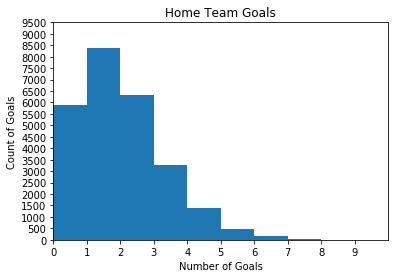

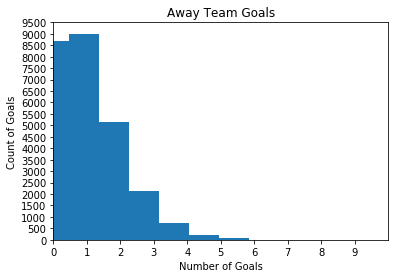

In [55]:
# Histogram of home_team_goal and away_team_goal.

plt.hist(match_modified_merge.loc[:, 'home_team_goal'], bins=10, align='mid')
plt.xlim(0, 10)
plt.ylim(0, 9000)
plt.xticks(range(0, 10))
plt.yticks(range(0, 10000, 500))
plt.title('Home Team Goals')
plt.xlabel('Number of Goals')
plt.ylabel('Count of Goals')
plt.savefig("plot1.png")
plt.show()


plt.hist(match_modified_merge.loc[:, 'away_team_goal'], bins=10, align='left')
plt.xlim(0, 10)
plt.ylim(0, 9000)
plt.xticks(range(0, 10))
plt.yticks(range(0, 10000, 500))
plt.title('Away Team Goals')
plt.xlabel('Number of Goals')
plt.ylabel('Count of Goals')
plt.savefig("plot2.png")
plt.show()

**We can clearly see that more number of away teams have 0 and 1 goal but less number of away teams have 2, 3, 4, 5 goals and this is opposite to that of home teams. Lets now try to analyse average goals scored by home teams and away teams season wise and stage wise.**

In [56]:
#Group data season wise and take the mean of goals scored and save it to a variable for analysis.
goals_mean_season_wise = match_modified_merge.groupby('season').mean()[['home_team_goal', 'away_team_goal']]

In [57]:
goals_mean_season_wise.head()

,home_team_goal,away_team_goal
season,,
2008/2009,1.505412,1.101924
2009/2010,1.541176,1.131269
2010/2011,1.548466,1.135276
2011/2012,1.572671,1.143789
2012/2013,1.550000,1.222699


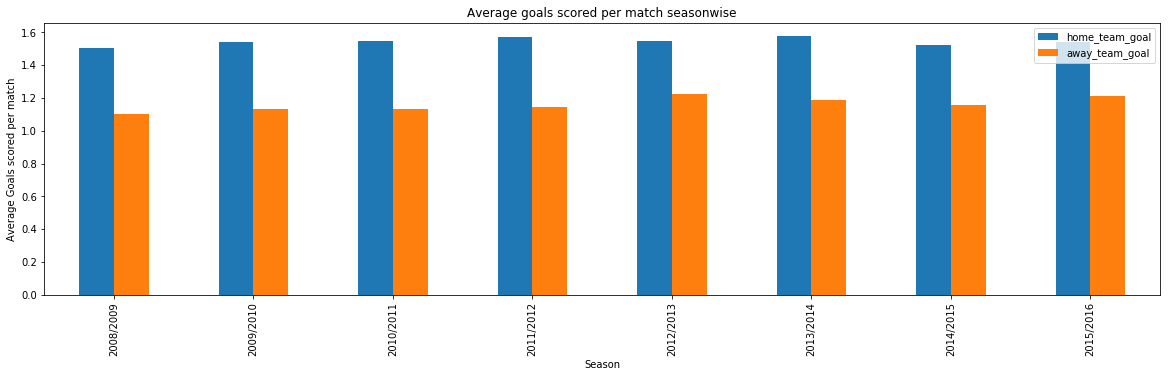

In [58]:
# Draw barplots for both the means season wise.
ax = goals_mean_season_wise.plot(kind = 'bar', figsize= (20, 5), title = 'Average goals scored per match seasonwise')
ax.set_xlabel('Season')
ax.set_ylabel('Average Goals scored per match')
plt.savefig("plot3.png")
plt.show()

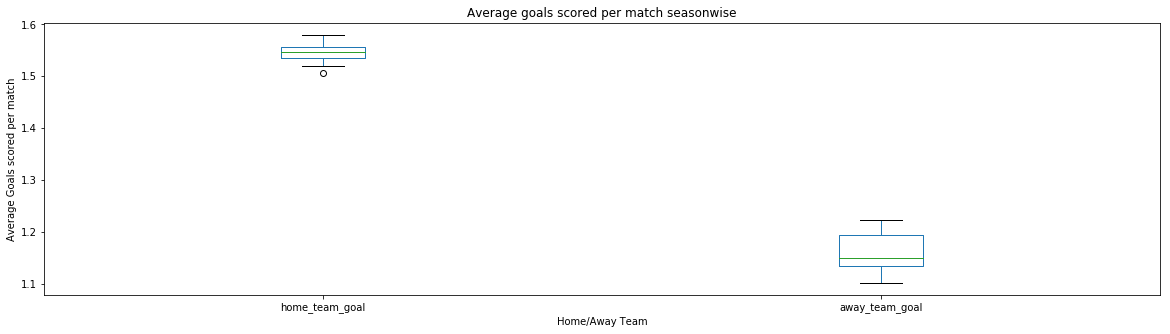

In [59]:
ax = goals_mean_season_wise.plot(kind = 'box', figsize= (20, 5), title = 'Average goals scored per match seasonwise')
ax.set_xlabel('Home/Away Team')
ax.set_ylabel('Average Goals scored per match')
plt.savefig("plot4.png")
plt.show()

**We can clearly see in every season, home team goals average is higher than away team goal average. Lets plot the similar thing stage wise.**

In [60]:
goals_mean_stage_wise = match_modified_merge.groupby('stage').mean()[['home_team_goal', 'away_team_goal']]

In [61]:
goals_mean_stage_wise

,home_team_goal,away_team_goal
stage,,
1,1.433784,1.151351
2,1.539189,1.183784
3,1.463514,1.145946
4,1.593243,1.143243
5,1.441892,1.133784
6,1.527027,1.154054
7,1.582656,1.161247
8,1.700542,1.241192
9,1.451220,1.130081


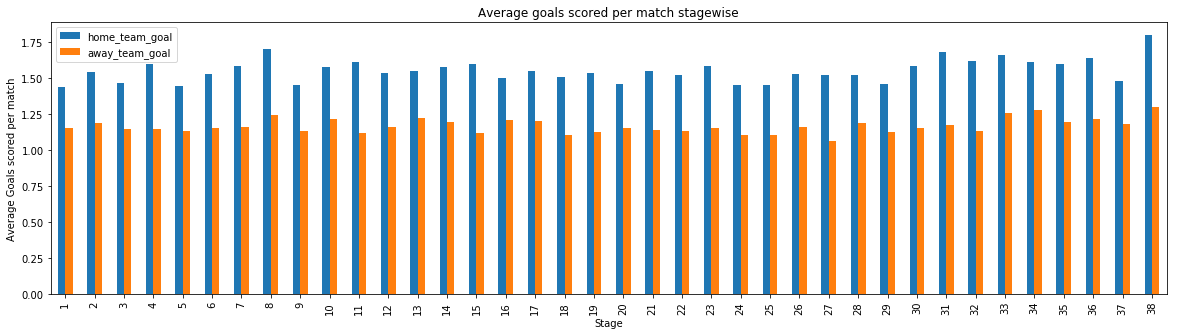

In [62]:
ax = goals_mean_stage_wise.plot(kind = 'bar', figsize= (20, 5), title = 'Average goals scored per match stagewise')
ax.set_xlabel('Stage')
ax.set_ylabel('Average Goals scored per match')
plt.savefig("plot5.png")
plt.show()

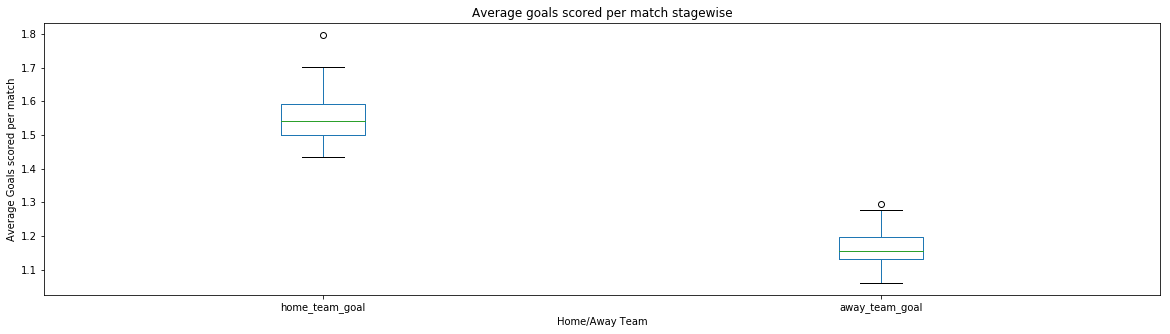

In [63]:
# Box plot of home team and away team average goals.
ax = goals_mean_stage_wise.plot(kind = 'box', figsize= (20, 5), title = 'Average goals scored per match stagewise')
ax.set_xlabel('Home/Away Team')
ax.set_ylabel('Average Goals scored per match')
plt.savefig("plot6.png")
plt.show()

**We can clearly see every stage has home team goal average higher than away team goal average. Lets plot it with both season as well as stage**

In [64]:
goals_mean_season_stage_wise = match_modified_merge.groupby(['season', 'stage']).mean()[['home_team_goal', 
                                                                                         'away_team_goal']]

In [65]:
goals_mean_season_stage_wise.head()

home_team_goal  away_team_goal
season    stage                                
2008/2009 1            1.500000        1.265957
          2            1.446809        0.872340
          3            1.457447        0.989362
          4            1.585106        1.202128
          5            1.531915        1.000000

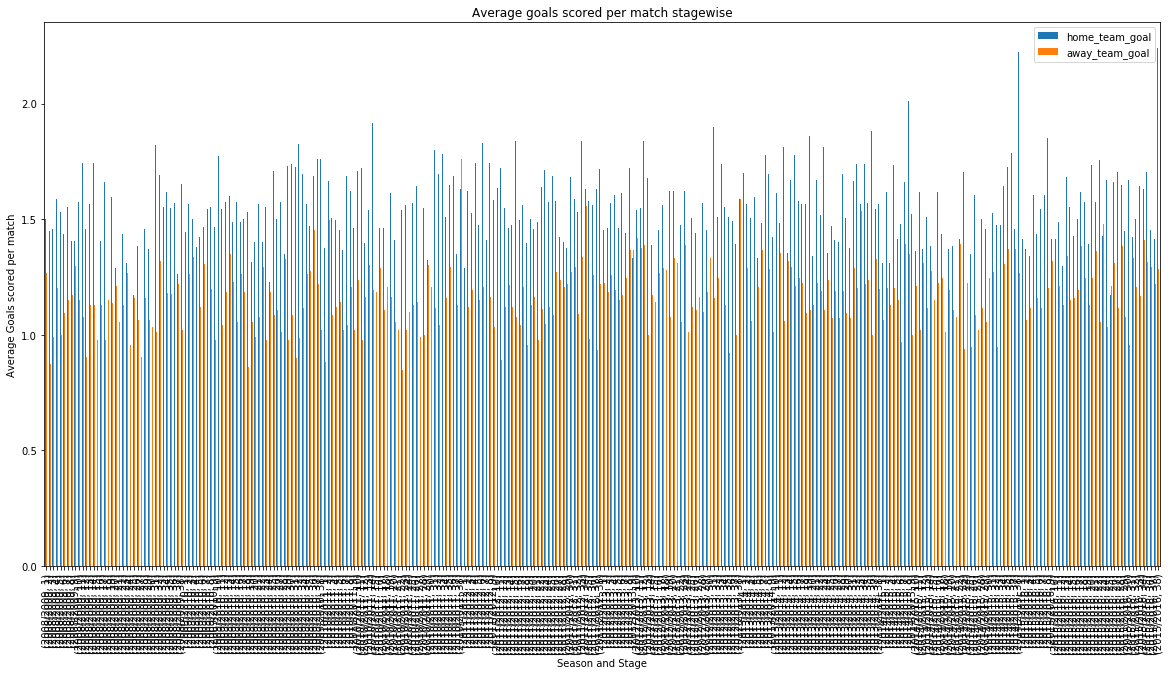

In [66]:
ax = goals_mean_season_stage_wise.plot(kind = 'bar', figsize= (20, 10), 
                                  title = 'Average goals scored per match stagewise')
ax.set_xlabel('Season and Stage')
ax.set_ylabel('Average Goals scored per match')
plt.savefig("plot7.png")
plt.show()

**We can clearly see almost all of the home team goals are more than away team goals. So this gives us some idea that home advantage is here as per graphics. Lets plot a graph of count of home team win and away team wins in a similar way as we plotted goals.**

### Question 2: Is there any home advantage? Are home teams have more victories than away teams?

In [67]:
match_groupby_home_win = match_modified_merge.groupby('home_win').count()['match_api_id']

In [68]:
match_groupby_home_win

home_win
draw      6596
loose     7466
win      11917
Name: match_api_id, dtype: int64

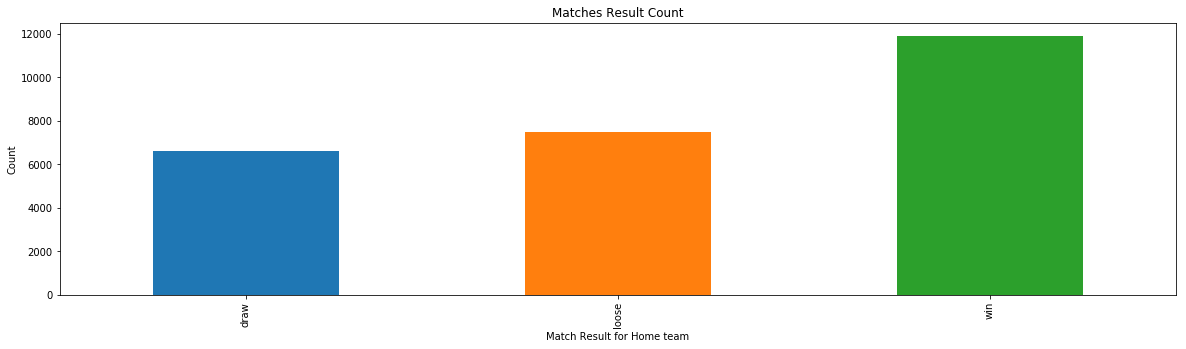

In [69]:
ax = match_groupby_home_win.plot(kind='bar', figsize= (20, 5), title = 'Matches Result Count')
ax.set_xlabel('Match Result for Home team')
ax.set_ylabel('Count')
plt.savefig("plot8.png")
plt.show()

**We can clearly see number of matches won by home team are far more than lost by home team. Lets plot same with season wise and stage wise.**

In [70]:
match_groupby_home_win_stagewise = match_modified_merge.groupby(['stage', 'home_win']).count()['match_api_id']

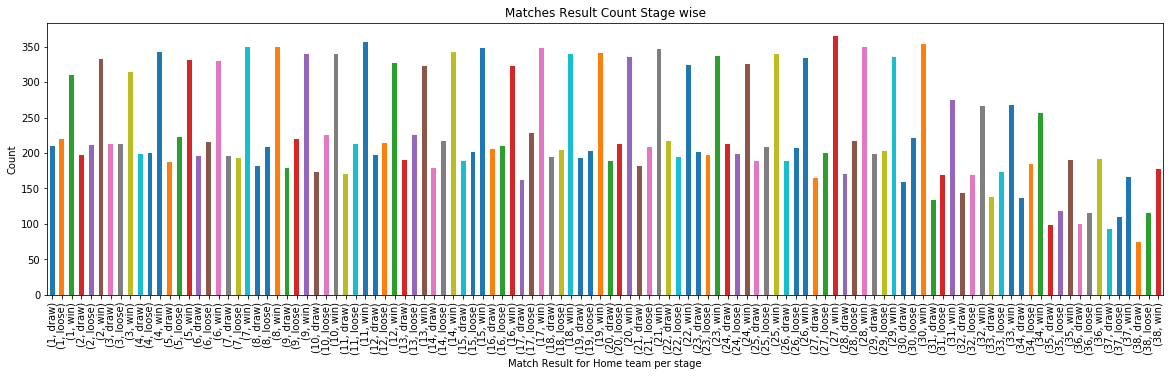

In [71]:
ax = match_groupby_home_win_stagewise.plot(kind='bar', figsize= (20, 5), 
                                           title = 'Matches Result Count Stage wise')
ax.set_xlabel('Match Result for Home team per stage')
ax.set_ylabel('Count')
plt.savefig("plot9.png")
plt.show()

In [72]:
match_groupby_home_win_seasonwise = match_modified_merge.groupby(['season', 'home_win']).count()['match_api_id']

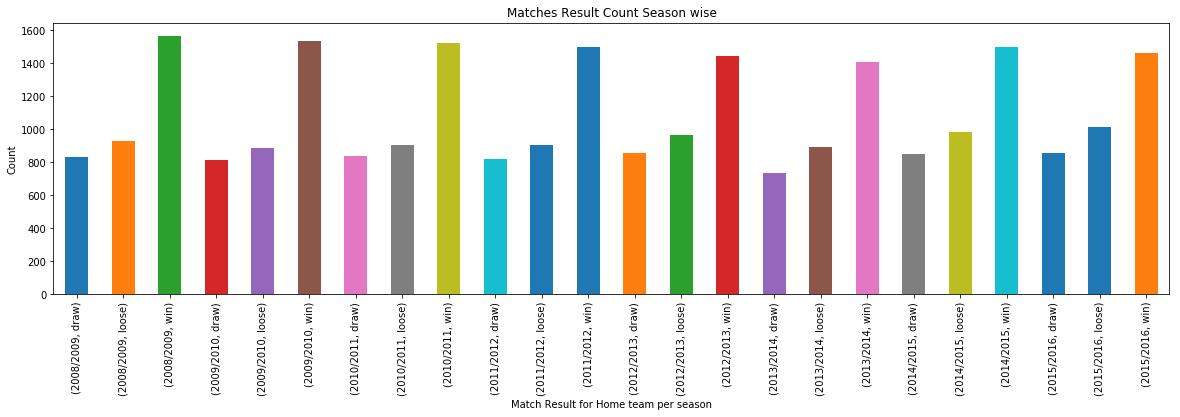

In [73]:
ax = match_groupby_home_win_seasonwise.plot(kind='bar', figsize= (20, 5), 
                                       title = 'Matches Result Count Season wise')
ax.set_xlabel('Match Result for Home team per season')
ax.set_ylabel('Count')
plt.savefig("plot10.png")
plt.show()

**We can clearly see stagewise or seasonwise we have higher numbers of home wins instead of draw or loose.**

### Question 3: Are average goals scored by home team are statistically higher than the average goals scored by away teams?

**Now we will use statistical mthods to find the significance of our conclusion. We will use t-statistics method and will apply it on mean of home team goals and away team goals which are season wise and stage wise.** 
**Following is the hypothesis.**
1. Null Hypothesis : Home team goals sample mean is less than or equal to away team goals sample mean.
2. Alternate Hypothesis : Home team goals sample mean is significantly higher than away team goals sample mean.

We will use confidence  interval of 95%.

> $H_0 : \mu_{home} \leq \mu_{away}$

> $H_a : \mu_{home} > \mu_{away}$

**Lets apply statistical significance test on goals_mean_season_stage_wise. This is an example of two condition test in which we have sample means of goals scored by home team and goals scored by away team during a stage. So we need to apply t-test here.**

In [74]:
# Lets check first few lines of the dataframe.
goals_mean_stage_wise.head()

,home_team_goal,away_team_goal
stage,,
1,1.433784,1.151351
2,1.539189,1.183784
3,1.463514,1.145946
4,1.593243,1.143243
5,1.441892,1.133784


In [75]:
# Function to calculate t_stats and t_critical value.
def calculation_of_t_stats(dataframe, confidence_interval_in_proportion = 0.95):
    """This function takes dataframe and confidence  interval as input and returns 
    sample_size, degree_of_freedom, point_estimate, sample_difference_stddev, 
    sample_error, t_stat and t_critical values."""
    dataframe['difference'] = dataframe.iloc[:, 0] - dataframe.iloc[:, 1]
    sample_size = dataframe.shape[0]
    degree_of_freedom = sample_size - 1
    point_estimate = dataframe['difference'].mean()
    sample_difference_stddev = dataframe['difference'].std()
    sample_error = sample_difference_stddev/math.sqrt(sample_size)
    t_stat = point_estimate/sample_error
    t_critical = stats.t.ppf(confidence_interval_in_proportion, degree_of_freedom)
    return(sample_size, degree_of_freedom, point_estimate, sample_difference_stddev, 
           sample_error, t_stat, t_critical)

In [76]:
# Calculation of t_stats and other parameters for goals_mean_stage_wise.

sample_size, degree_of_freedom, point_estimate, sample_difference_stddev, sample_error, \
t_stat, t_critical= calculation_of_t_stats(goals_mean_stage_wise, 0.95)

print("Analysis of goals_mean_stage_wise")
print("Sample size is {}".format(sample_size))
print("degree of freedom is {}".format(degree_of_freedom))
print("point estimate is {}".format(point_estimate))
print("Sample difference standard deviation is {}".format(sample_difference_stddev))
print("Sample error is {}".format(sample_error))
print("t statistics value is {}".format(t_stat))
print("t statistics critical value is {}".format(t_critical))

Analysis of goals_mean_stage_wise
Sample size is 38
degree of freedom is 37
point estimate is 0.385906672824
Sample difference standard deviation is 0.0630858922846
Sample error is 0.0102338830997
t statistics value is 37.7087239579
t statistics critical value is 1.68709361671


In [77]:
# Calculation of t_stats and other parameters for goals_mean_season_wise.

sample_size, degree_of_freedom, point_estimate, sample_difference_stddev, sample_error, \
t_stat, t_critical= calculation_of_t_stats(goals_mean_season_wise, 0.95)

print("Analysis of goals_mean_stage_wise")
print("Sample size is {}".format(sample_size))
print("degree of freedom is {}".format(degree_of_freedom))
print("point estimate is {}".format(point_estimate))
print("Sample difference standard deviation is {}".format(sample_difference_stddev))
print("Sample error is {}".format(sample_error))
print("t statistics value is {}".format(t_stat))
print("t statistics critical value is {}".format(t_critical))

Analysis of goals_mean_stage_wise
Sample size is 8
degree of freedom is 7
point estimate is 0.383942954469
Sample difference standard deviation is 0.0380497936509
Sample error is 0.0134526335566
t statistics value is 28.5403562694
t statistics critical value is 1.89457860506


**We can clearly see that both stage wise as well as season wise sample mean of home team goals are statistically higher than the sample mean of the away team goals.**

**Statistical result of season wise goals data.**
> Sample size is 38

> degree of freedom is 37

> point estimate is 0.38590667282401886

> Sample difference standard deviation is 0.06308589228457105

> Sample error is 0.010233883099705325

> t statistics value is 37.7087239578817

> t statistics critical value is 1.6870936167109873

**Statistical result of stage wise goals data.**
> Sample size is 8

> degree of freedom is 7

> point estimate is 0.3839429544687567

> Sample difference standard deviation is 0.03804979365087002

> Sample error is 0.013452633556639516

> t statistics value is 28.54035626944306

> t statistics critical value is 1.894578605061305

<a id='conclusions'></a>
## Conclusions

### Question 1: Are average goals scored by home teams are higher than the average goals scored by away teams?
**With all the visualizations like histogram, bar plots and box plots, we can clearly see that average goals scored by home teams are higher than the average goals scored by away teams.**

### Question 2: Is there any home advantage? Are home teams have more victories than away teams? 
**With all the bar plots created for win/loose/draw, we can clearly see that home teams are having more victories than loses.**


### Question 3: Are average goals scored by home teams are statistically higher than the average goals scored by away teams?
**t-test clearly denotes that alternative hypothesis is true which is sample mean of goals scored by home teams are significantly higher than the sample mean of goals scored by away teams. So there is clear correlation between higher goals scored and home teams but that doesnt clearly signifies that home conditions causes teams to score higher goals. There could be other factors involved like performance of the players which can also contribute to the higher goal counts for home teams.**

<a id='limitations'></a>
## Limitations

I would like to further explore what are various factors which can lead to or contribute in a team's win or loss, team's performances over the years and player's performances over the years but I can see following limitations.
> There is lot of missing data in Match table related to information of players and various other information also. Players are one of the key factors in the result of a match but having lot of missing values don't allow for analysis from players point of view.

> Lot of values are missing in Player_Attributes table which makes it very difficult player's performance.

> Details of various variables (columns) are missing Team_Attributes table. So it is hard to analyze the Team_attributes and ultimately team's performance over the years.

<a id='resources'></a>
## Resources Used
1. Help documentations of Pandas.
2. Google search.
3. Stackoverflow.